<a href="https://colab.research.google.com/github/isarps/ai-python/blob/main/Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd

url = 'https://raw.githubusercontent.com/isarps/ai-python/main/exams.csv'
job = pd.read_csv(url, sep = ',')
job.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [41]:
job['math score'] = job['math score'].astype(float)
job['reading score'] = job['reading score'].astype(float)
job['writing score'] = job['writing score'].astype(float)

In [42]:
job.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [43]:
job.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [44]:
# Verifica valores nulos
for attribute in job:
    null_values = job[attribute].isnull().sum()
    if null_values > 0:
        print(attribute + ': ' + str(null_values)) 

In [45]:
y = job[['test preparation course']]
x = job.drop(['test preparation course'], axis=1)
x.head(5)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group D,some college,standard,59.0,70.0,78.0
1,male,group D,associate's degree,standard,96.0,93.0,87.0
2,female,group D,some college,free/reduced,57.0,76.0,77.0
3,male,group B,some college,free/reduced,70.0,70.0,63.0
4,female,group D,associate's degree,standard,83.0,85.0,86.0


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(x.dtypes != float)[0]

print(categorical_features_indices)

[0 1 2 3]


In [61]:
model = CatBoostClassifier(
    custom_loss=[metrics.Precision()], #metrica de teste da arvore
    random_seed=42, #para dar o mesmo resultado
    logging_level='Silent', #para não plotar o log
    auto_class_weights='Balanced' #para balanceamento
)

model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Acuracy: 0.71
Precision: 0.73
Matriz de Confusão


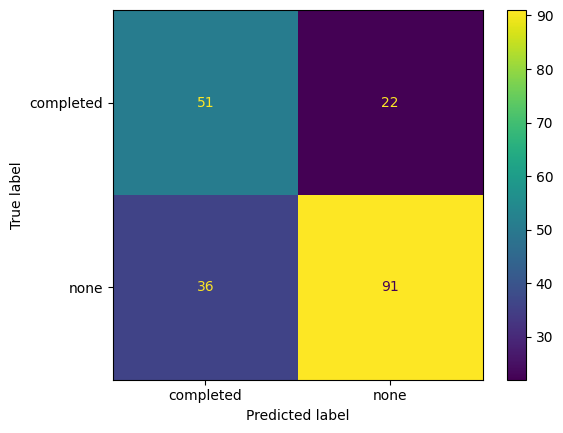

In [62]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(x_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acuracy: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train['test preparation course'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train['test preparation course'].unique())
disp.plot()